In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Replace with reading in train and test data from wherever
train = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Stats_Learning_Final_Project/test.csv')

In [ ]:
train = train.drop('Unnamed: 0', axis = 1)
test = test.drop('Unnamed: 0', axis = 1)

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
train_sample = train.groupby('DiabetesStatus', group_keys=False).apply(lambda x: x.sample(1000))

In [ ]:
X_train_sample = train_sample.iloc[:,:-1]
y_train_sample = train_sample.iloc[:,-1]

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Hyperparameter Tuning

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
gb.fit(X_train_sample,y_train_sample)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
gb.score(X_test,y_test)

0.7213531412206909

In [ ]:
param_test1 = {
 'n_estimators':range(100,501,50)
}

In [ ]:
gsearch1 = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, random_state=0), param_test1, n_jobs=-1,verbose=3)
gsearch1.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1,
                                                  random_state=0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 501, 50)},
             verbose=3)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 300}, 0.6796666666666666)

In [ ]:
param_test1b = {
 'n_estimators':range(260,341,20)
}

In [ ]:
gsearch1b = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, random_state=0), param_test1b, n_jobs=-1,verbose=3)
gsearch1b.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1,
                                                  random_state=0),
             n_jobs=-1, param_grid={'n_estimators': range(260, 341, 20)},
             verbose=3)

In [ ]:
gsearch1b.best_params_, gsearch1b.best_score_

({'n_estimators': 300}, 0.6796666666666666)

In [ ]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_samples_split':[0.1,0.2,0.3]
}

In [ ]:
gsearch2 = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, n_estimators=300,random_state=0), param_test2, n_jobs=-1,verbose=3)
gsearch2.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ens

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1,
                                                  n_estimators=300,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_samples_split': [0, 0.1, 0.2, 0.3]},
             verbose=3)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 0.1}, 0.674)

In [ ]:
param_test2b = {
 'max_depth':[8,9,10,11],
 'min_samples_split':[0.02,0.06,0.1]
}

In [ ]:
gsearch2b = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, n_estimators=300,random_state=0), param_test2b, n_jobs=-1,verbose=3)
gsearch2b.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1,
                                                  n_estimators=300,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11],
                         'min_samples_split': [0.02, 0.06, 0.1]},
             verbose=3)

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

({'max_depth': 8, 'min_samples_split': 0.02}, 0.6856666666666666)

In [ ]:
param_test2c = {
 'max_depth':[7,8,9],
 'min_samples_split':[0.005,0.01,0.015,0.02]
}

In [ ]:
gsearch2c = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, n_estimators=300,random_state=0), param_test2c, n_jobs=-1,verbose=3)
gsearch2c.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1,
                                                  n_estimators=300,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'min_samples_split': [0.005, 0.01, 0.015, 0.02]},
             verbose=3)

In [ ]:
gsearch2c.best_params_, gsearch2c.best_score_

({'max_depth': 8, 'min_samples_split': 0.01}, 0.6876666666666666)

In [ ]:
param_test3 = {
 'max_features':[0.3,0.6,0.9, 1],
}

In [ ]:
gsearch3 = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, n_estimators=300,random_state=0, max_depth = 8, min_samples_split = 0.01), param_test3, n_jobs=-1,verbose=3)
gsearch3.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1, max_depth=8,
                                                  min_samples_split=0.01,
                                                  n_estimators=300,
                                                  random_state=0),
             n_jobs=-1, param_grid={'max_features': [0.3, 0.6, 0.9, 1]},
             verbose=3)

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 0.3}, 0.683)

In [ ]:
param_test3b = {
 'max_features':[0.1,0.2,0.3, 0.4,0.5],
}

In [ ]:
gsearch3b = GridSearchCV(GradientBoostingClassifier(learning_rate = 1, n_estimators=300,random_state=0, max_depth = 8, min_samples_split = 0.01), param_test3b, n_jobs=-1,verbose=3)
gsearch3b.fit(X_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1, max_depth=8,
                                                  min_samples_split=0.01,
                                                  n_estimators=300,
                                                  random_state=0),
             n_jobs=-1, param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5]},
             verbose=3)

In [ ]:
gsearch3b.best_params_, gsearch3b.best_score_

({'max_features': 0.3}, 0.683)

## Tuned Model

In [ ]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.03,n_estimators=1000,random_state=0, max_depth=8, min_samples_split=0.01, max_features=0.3, n_iter_no_change = 50)

In [ ]:
gb_tuned.fit(X_train_sample,y_train_sample)

GradientBoostingClassifier(learning_rate=0.03, max_depth=8, max_features=0.3,
                           min_samples_split=0.01, n_estimators=1000,
                           n_iter_no_change=50, random_state=0)

In [ ]:
gb_tuned.score(X_test,y_test)

0.7244317164846966

In [ ]:
gb_tuned.estimators_.shape

(218, 3)

In [ ]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.03,n_estimators=218,random_state=0, max_depth=8, min_samples_split=0.01, max_features=0.3)

In [ ]:
gb_tuned.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=8, max_features=0.3,
                           min_samples_split=0.01, n_estimators=218,
                           random_state=0)

In [ ]:
gb_tuned.score(X_test,y_test)

0.7538929658134956

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred_labels = gb_tuned.predict(X_test)

In [ ]:
f1_score(y_test, pred_labels, average = 'macro')

0.4537549896057695

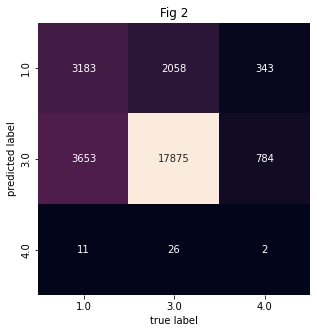

In [ ]:
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Gradient Boost');

# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
y_train2 = y_train.replace({3:0,4:2})
y_train_sample2 = y_train_sample.replace({3:0,4:2})
y_test2 = y_test.replace({3:0,4:2})

In [ ]:
y_train_sample2.value_counts()

1.0    1000
0.0    1000
2.0    1000
Name: DiabetesStatus, dtype: int64

## Hyperparameter Tuning

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    #print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [ ]:
param = {'learning_rate':0.05,'n_estimators':2000,'max_depth':9, 'objective':'multi:softprob','eval_metric':'mlogloss','num_class':3,'seed':123}
data_dmatrix = xgb.DMatrix(data=X_train_sample,label=y_train_sample2)

In [ ]:
cv_results = xgb.cv(params = param, dtrain = data_dmatrix, nfold=5,
       num_boost_round=2000,early_stopping_rounds=50,metrics="mlogloss", as_pandas=True, seed=123)

In [ ]:
print((cv_results["train-mlogloss-mean"]).tail(1))

142    0.131064
Name: train-mlogloss-mean, dtype: float64


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [ ]:
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test1, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch1.fit(X_train_sample,y_train_sample2)


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', learning_rate=0.05,
                                     max_depth=5, n_estimators=142, nthread=4,
                                     num_class=3, objective='multi:softprob',
                                     seed=123, subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_log_loss')

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 1}, -0.680620068452942)

In [ ]:
param_test1b = {
 'max_depth':[6,7,8],
 'min_child_weight':[0.5,1,1.5,2]
}

In [ ]:
gsearch1b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test1b, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch1b.fit(X_train_sample,y_train_sample2)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', learning_rate=0.05,
                                     max_depth=5, n_estimators=142, nthread=4,
                                     num_class=3, objective='multi:softprob',
                                     seed=123, subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': [6, 7, 8],
                         'min_child_weight': [0.5, 1, 1.5, 2]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch1b.best_params_, gsearch1b.best_score_

({'max_depth': 7, 'min_child_weight': 0.5}, -0.6784368590774635)

In [ ]:
param_test1c = {
 'min_child_weight':[0,0.25,0.5]
}

In [ ]:
gsearch1c = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test1c, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch1c.fit(X_train_sample,y_train_sample2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', learning_rate=0.05,
                                     max_depth=7, n_estimators=142, nthread=4,
                                     num_class=3, objective='multi:softprob',
                                     seed=123, subsample=0.8),
             n_jobs=4, param_grid={'min_child_weight': [0, 0.25, 0.5]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch1c.best_params_, gsearch1c.best_score_

({'min_child_weight': 0.5}, -0.6784368590774635)

In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(5,10)]
}

In [ ]:
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=7,
 min_child_weight=0.5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test2, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch2.fit(X_train_sample,y_train_sample2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', learning_rate=0.05,
                                     max_depth=7, min_child_weight=0.5,
                                     n_estimators=142, nthread=4, num_class=3,
                                     objective='multi:softprob', seed=123,
                                     subsample=0.8),
             n_jobs=4, param_grid={'gamma': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.7}, -0.6778897789083421)

In [ ]:
param_test2b = {
 'gamma':[0.6,0.7,0.8]
}

In [ ]:
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=7,
 min_child_weight=0.5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test2b, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch2b.fit(X_train_sample,y_train_sample2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', learning_rate=0.05,
                                     max_depth=7, min_child_weight=0.5,
                                     n_estimators=142, nthread=4, num_class=3,
                                     objective='multi:softprob', seed=123,
                                     subsample=0.8),
             n_jobs=4, param_grid={'gamma': [0.6, 0.7, 0.8]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

({'gamma': 0.7}, -0.6778897789083421)

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [ ]:
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=7,
 min_child_weight=0.5, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test3, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch3.fit(X_train_sample,y_train_sample2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', gamma=0.7,
                                     learning_rate=0.05, max_depth=7,
                                     min_child_weight=0.5, n_estimators=142,
                                     nthread=4, num_class=3,
                                     objective='multi:softprob', seed=123,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, -0.6748412205396842)

In [ ]:
param_test3b = {
 'subsample':[i/10.0 for i in range(4,7)],
 'colsample_bytree':[0.9,1]
}

In [ ]:
gsearch3b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=142, max_depth=7,
 min_child_weight=0.5, gamma=0.7, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=3, eval_metric='mlogloss', nthread=4, scale_pos_weight=1, seed=123), 
 param_grid = param_test3b, scoring='neg_log_loss',n_jobs=4, cv=5, verbose = 3)
gsearch3b.fit(X_train_sample,y_train_sample2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     eval_metric='mlogloss', gamma=0.7,
                                     learning_rate=0.05, max_depth=7,
                                     min_child_weight=0.5, n_estimators=142,
                                     nthread=4, num_class=3,
                                     objective='multi:softprob', seed=123,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.9, 1],
                         'subsample': [0.4, 0.5, 0.6]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
gsearch3b.best_params_, gsearch3b.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.6}, -0.6887621011361479)

In [ ]:
param = {'learning_rate':0.03,'n_estimators':2000,'max_depth':7,'min_child_weight':0.5, 'gamma':0.7, 'colsample_bytree':0.9, 'subsample':0.6, 'objective':'multi:softprob','eval_metric':'mlogloss','num_class':3,'seed':123}
data_dmatrix = xgb.DMatrix(data=X_train_sample,label=y_train_sample2)

In [ ]:
cv_results = xgb.cv(params = param, dtrain = data_dmatrix, nfold=5,
       num_boost_round=2000,early_stopping_rounds=50,metrics="mlogloss", as_pandas=True, seed=123)

In [ ]:
print((cv_results["train-mlogloss-mean"]).tail(1))

387    0.197533
Name: train-mlogloss-mean, dtype: float64


## Tuned Model

In [ ]:
xgb_tuned = xgb.XGBClassifier(learning_rate=0.03,n_estimators=387,max_depth=7,min_child_weight=0.5, gamma=0.7, colsample_bytree=0.9, subsample=0.6, objective='multi:softprob',eval_metric='mlogloss',num_class=3,seed=123)

In [ ]:
xgb_tuned.fit(X_train_sample,y_train_sample2)

XGBClassifier(colsample_bytree=0.9, eval_metric='mlogloss', gamma=0.7,
              learning_rate=0.03, max_depth=7, min_child_weight=0.5,
              n_estimators=387, num_class=3, objective='multi:softprob',
              seed=123, subsample=0.6)

In [ ]:
xgb_tuned.score(X_test,y_test2)

0.7335958475031322

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred_labels = xgb_tuned.predict(X_test)

In [ ]:
f1_score(y_test2, pred_labels, average = 'macro')

0.4484518582271722

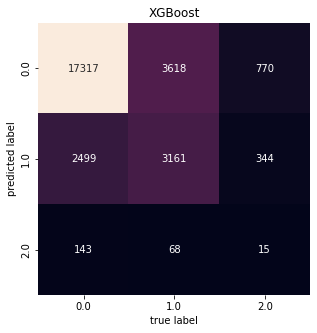

In [ ]:
mat = confusion_matrix(y_test2, pred_labels)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train2), yticklabels=np.unique(y_train2))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('XGBoost');

<BarContainer object of 30 artists>

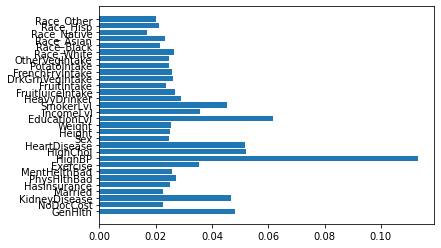

In [ ]:
plt.barh(X_train.columns, xgb_tuned.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

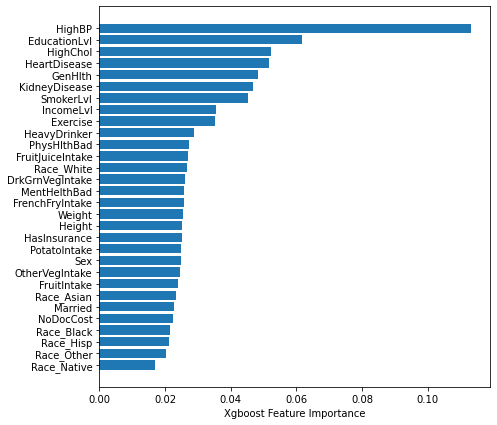

In [ ]:
sorted_idx = xgb_tuned.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(X_train.columns[sorted_idx], xgb_tuned.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")